In [1]:
pip install pyspark

     ---------------------------------------- 0.0/316.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/316.9 MB ? eta -:--:--
     ---------------------------------------- 0.2/316.9 MB 2.9 MB/s eta 0:01:50
     ---------------------------------------- 0.9/316.9 MB 6.1 MB/s eta 0:00:53
     ---------------------------------------- 1.6/316.9 MB 8.5 MB/s eta 0:00:38
     --------------------------------------- 2.4/316.9 MB 11.1 MB/s eta 0:00:29
     --------------------------------------- 3.4/316.9 MB 12.9 MB/s eta 0:00:25
     --------------------------------------- 3.8/316.9 MB 13.3 MB/s eta 0:00:24
     --------------------------------------- 3.9/316.9 MB 10.8 MB/s eta 0:00:30
      -------------------------------------- 4.6/316.9 MB 10.9 MB/s eta 0:00:29
      -------------------------------------- 5.2/316.9 MB 11.5 MB/s eta 0:00:28
      -------------------------------------- 6.2/316.9 MB 12.0 MB/s eta 0:00:26
      -------------------------------------- 6.7/316.9

In [3]:
pip install findspark

Note: you may need to restart the kernel to use updated packages.


In [1]:
import findspark
findspark.find()

from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master("local") \
    .appName("Spark") \
    .config("spark.sql.repl.eagerEval.enabled", True) \
    .getOrCreate()

In [2]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql import Window
from pyspark.sql.functions import col

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
spark = SparkSession.builder.appName('Data_vote').getOrCreate()
sc=spark.sparkContext
sc.setSystemProperty('spark.executor.cores', '2')
sc.setSystemProperty('spark.executor.memory', '2g')
sc.setSystemProperty('spark.driver.memory', '1g')
sc.setSystemProperty('spark.driver.cores', '1')

In [5]:
data = spark.read.csv('C:/Users/hyeee/Desktop/빅데이터/reply_all.csv', header=True)

# 데이터 전처리
* 필요 없는 열 '제목', '아이디', '댓글 내용' 제거
* 좋아요 수 * 감정 으로 새로운 열 '계산' 추가
* 

In [6]:
data = data.withColumn('라벨', col('라벨').cast('string'))
data = data.withColumn('계산', col('좋아요 수') * col('감정'))
data = data.drop('제목').drop('아이디').drop('댓글 내용')
data = data.dropna()

In [30]:
data.show(5)

+---------+----+----+----+
|좋아요 수|라벨|감정|계산|
+---------+----+----+----+
|        4|   b|  -1|-4.0|
|        1|   b|   1| 1.0|
|        1|   b|   1| 1.0|
|        3|   b|  -1|-3.0|
|        4|   b|  -1|-4.0|
+---------+----+----+----+
only showing top 5 rows



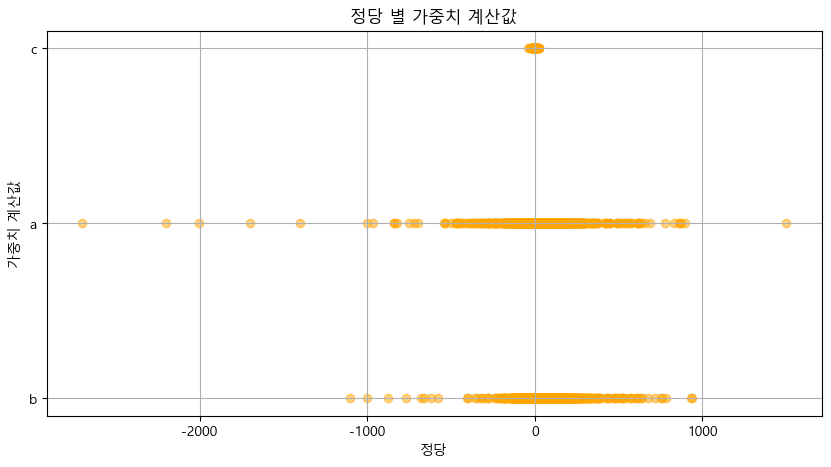

In [7]:
data_pd = data.toPandas()
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

plt.figure(figsize=(10, 5))
plt.scatter(data_pd['계산'], data_pd['라벨'], alpha=0.5, color='orange')
plt.title('정당 별 가중치 계산값')
plt.xlabel('정당')
plt.ylabel('가중치 계산값')
plt.grid(True)
plt.show()

In [8]:
#산점도 결과 라벨'c'의 데이터가 존재함을 확인하여 라벨'c' 제거
data = data.filter(col('라벨') != 'c')

<Figure size 1000x500 with 0 Axes>

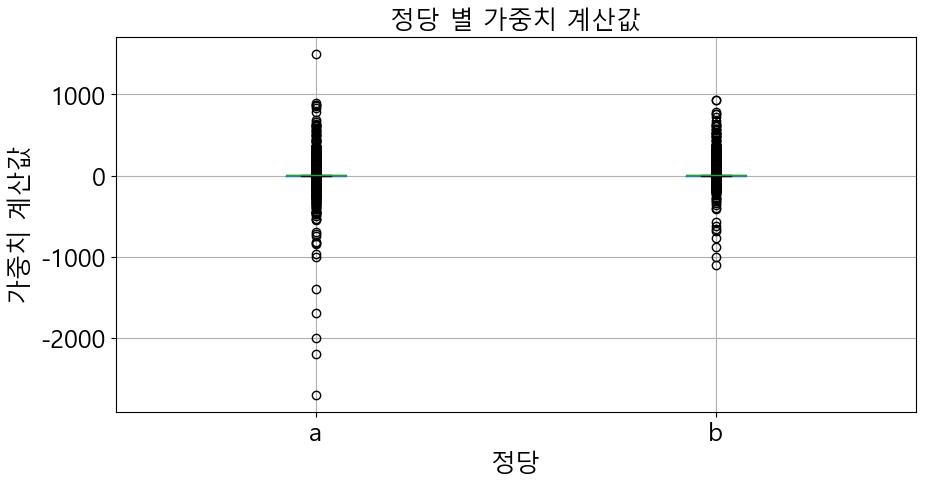

In [9]:
import matplotlib.pyplot as plt

data_pd = data.toPandas()

plt.figure(figsize=(10, 5))
# Create a boxplot
data_pd.boxplot(column='계산', by='라벨', figsize=(10,5), fontsize=18)
plt.title('정당 별 가중치 계산값', fontsize=18)
plt.suptitle('')
plt.xlabel('정당', fontsize=18)
plt.ylabel('가중치 계산값', fontsize=18)
plt.grid(True)
plt.show()

In [10]:
from pyspark.sql.functions import col, sum as _sum

In [11]:
sums_df = data.groupBy('라벨').pivot('감정').sum('계산')
sums_df.show()

+----+--------+---+--------+
|라벨|      -1|  0|       1|
+----+--------+---+--------+
|   b|-65008.0|0.0|216665.0|
|   a|-80680.0|0.0|129154.0|
+----+--------+---+--------+



In [12]:
ratio_a_p = 129154.0/(abs(-80680.0)+129154.0)
ratio_a_n = abs(-80680.0)/(abs(-80680.0)+129154.0)
ratio_b_p = 129154.0/(abs(-65008.0)+216665.0)
ratio_b_n = abs(-65008.0)/(abs(-65008.0)+216665.0)

In [13]:
labels = ['긍정', '부정']
ratio_a =  [ratio_a_p, ratio_a_n]
ratio_b =  [ratio_b_p, ratio_b_n]

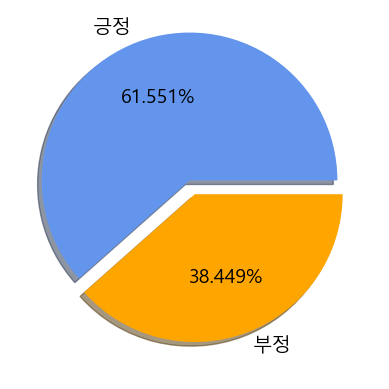

In [17]:
plt.pie(ratio_a, labels=labels, autopct='%.3f%%',  
        colors=['cornflowerblue', 'orange'], textprops={'fontsize': 14}, explode=(0.1, 0), shadow =True)
plt.show()

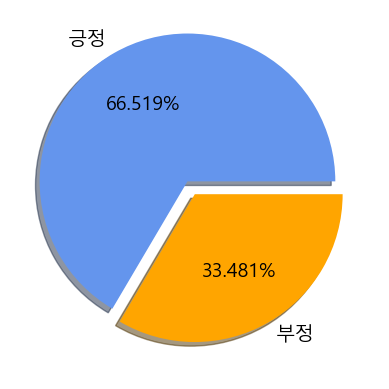

In [19]:
plt.pie(ratio_b, labels=labels, autopct='%.3f%%',  colors=['cornflowerblue', 'orange'],  
        textprops={'fontsize': 14},  explode=(0.1, 0), shadow =True)
plt.show()

이전 총선

In [22]:
data2 = spark.read.csv('C:/Users/hyeee/Desktop/빅데이터/reply_2020_2.csv', header=True)

In [23]:
data2 = data2.withColumn('라벨', col('라벨').cast('string'))
data2 = data2.withColumn('계산', col('좋아요 수') * col('감정'))
data2 = data2.drop('제목').drop('아이디').drop('댓글 내용')
data2 = data2.dropna()

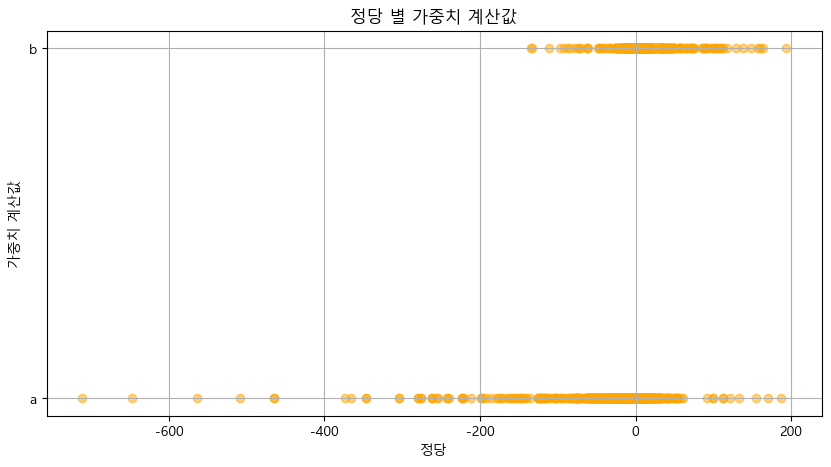

In [25]:
data_pd2 = data2.toPandas()
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

plt.figure(figsize=(10,5))
plt.scatter(data_pd2['계산'], data_pd2['라벨'], alpha=0.5, color='orange')
plt.title('정당 별 가중치 계산값')
plt.xlabel('정당')
plt.ylabel('가중치 계산값')
plt.grid(True)
plt.show()

<Figure size 1000x500 with 0 Axes>

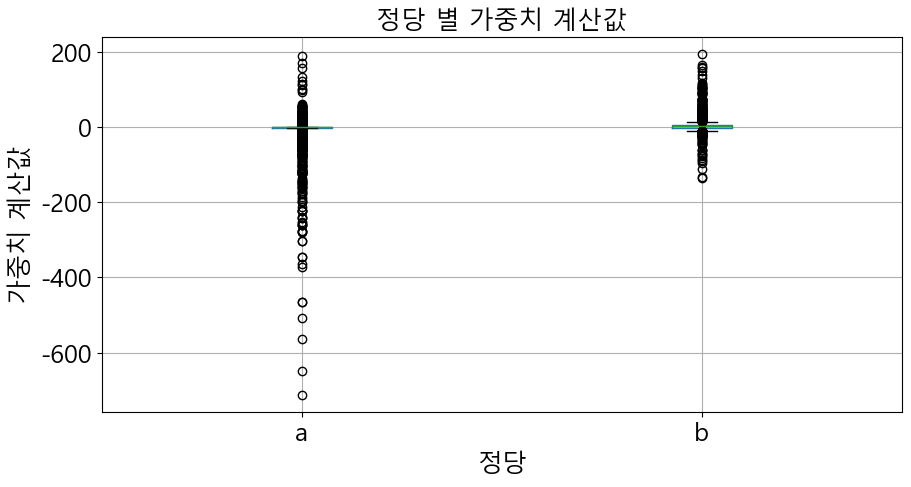

In [26]:
plt.figure(figsize=(10, 5))
# Create a boxplot
data_pd2.boxplot(column='계산', by='라벨', figsize=(10,5), fontsize=18)
plt.title('정당 별 가중치 계산값', fontsize=18)
plt.suptitle('')
plt.xlabel('정당', fontsize=18)
plt.ylabel('가중치 계산값', fontsize=18)
plt.grid(True)
plt.show()

In [27]:
sums_df2 = data2.groupBy('라벨').pivot('감정').sum('계산')
sums_df2.show()

+----+--------+-------+
|라벨|      -1|      1|
+----+--------+-------+
|   b| -5193.0|12479.0|
|   a|-41623.0| 8772.0|
+----+--------+-------+



In [28]:
ratio_a_p = 8772.0/(abs(-41623.0)+8772.0)
ratio_a_n = abs(-41623.0)/(abs(-41623.0)+8772.0)

ratio_b_p = 12479.0/(abs(-5193.0)+12479.0)
ratio_b_n = abs(-5193.0)/(abs(-5193.0)+12479.0)

In [29]:
labels = ['긍정', '부정']
ratio_a =  [ratio_a_p, ratio_a_n]
ratio_b =  [ratio_b_p, ratio_b_n]

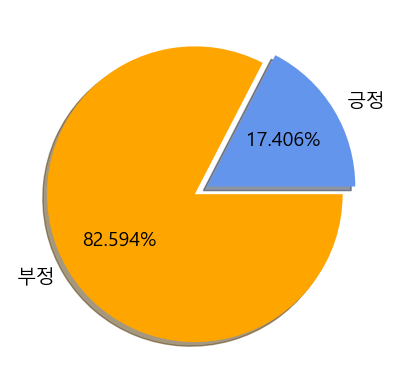

In [30]:
plt.pie(ratio_a, labels=labels, autopct='%.3f%%',  colors=['cornflowerblue', 'orange'], 
        textprops={'fontsize': 14}, explode=(0.1, 0), shadow =True)
plt.show()

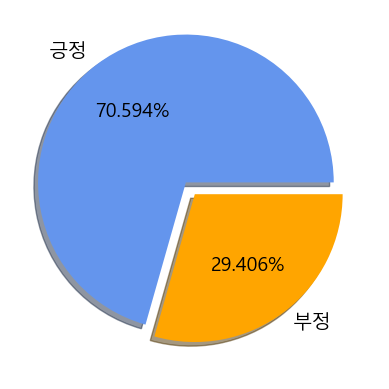

In [30]:
plt.pie(ratio_b, labels=labels, autopct='%.3f%%',  colors=['cornflowerblue', 'orange'], 
        textprops={'fontsize': 14}, explode=(0.1, 0), shadow =True)
plt.show()